# A. CAR SHARING SERVICES COMPANY


### B. PROBLEM STATEMENT

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Research Question

> Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

> What is the most popular hour for returning cars?

    1. What station is the most popular?
    2. Overall?
    3. At the most popular picking hour?

> What postal code is the most popular for picking up Blue cars? 

> Does the most popular station belong to that postal code?

    1. Overall?
    2. At the most popular picking hour?

> Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 


### TO INCLUDE :
> Two or more user defined functions

# 1.0 LOAD LIBRARIES 
> (Pandas, Numpy and the SQL lite extenstion)

In [141]:
# import pandas
import pandas as pd
# import pandas
import numpy as np
# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt 
% matplotlib inline 

In [142]:
# import and loading sqlite extension
%load_ext sql

# Then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed. 
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

# 2.0 LOADING OUR DATA CHECK BASIC INFO ABOUT IT, AND VIEW HEAD AND TAIL


##2.1 LOAD DATA 

In [143]:
# Function to load our data: should check wether its csv or excel format 
def data_loader(file_path):
  df = pd.read_csv(file_path)
  return df


In [144]:
# funtion to check data info and type size shape etc
def check_data(dataframe):
  head = dataframe.head()
  tail = dataframe.tail()
  about = dataframe.info()
  shape = dataframe.shape
  columns = dataframe.columns
  describe = dataframe.describe()

  return head,tail,about,shape,columns,describe

In [145]:
# function to check for nan values in our data
def is_missing_empty(dataframe):
  # check sum of null values
  missing = dataframe.isnull().sum()

  return missing

In [146]:
# load our data using the function created above
path = "/content/Autolib_dataset.csv"
df = data_loader(path)

In [147]:
# check info using funtion above
head,tail,about,shape,columns,describe = check_data(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [148]:
# check missing values
missing_summary = is_missing_empty(df)

missing_summary

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

## 2.2 VIEW OUR DATA

In [149]:
# View head 
head

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [150]:
# view tail
tail

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [151]:
# describe
describe

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [152]:
#columns
columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [153]:
#shape
shape

(5000, 25)

#3.0 DATA CLEANING



###3.1 Missing Data 1

  1. recode / replace values
  2. fill forwad / backward
  3. Interpolate missing values
  4. Drop delete missing values


In [154]:
# check columns with nulls
df[['Scheduled at','Displayed comment']].head()

,Scheduled at,Displayed comment
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [155]:
# drop columns with nulls
df = df.drop(['Scheduled at','Displayed comment'], axis=1)

In [156]:
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [157]:
new_missing = is_missing_empty(df)
new_missing

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [158]:
# final check
df.isnull().values.any()

False

In [159]:
# check info using funtion above
head,tail,about,shape,columns,describe = check_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Geo point            5000 non-null   object
 11  Postal code          5000 non-null   int64 
 12  Public name          5000 non-null   object
 13  Rental status        5000 non-null   object
 14  Slots                5000 non-null   int64 
 15  Station type         5000 non-null   object
 16  Status

###3.2 Missing Data 2
  1. Validity: removing unwanted data and syntax errors in strings
  2. Accuracy: remove nan / empty values and reset index
  3. Completeness:
        - Checking if there is any missing value in dataframe as a whole
        - Checking if there is any missing value across each column
        - Checking how many missing values there are across each column
        - do a quick check to see if we have any missing values at all
        - Dropping all attributes that have all NA values

In [160]:
# since our data seems to be void of any missing value
# This section is not needed as much 

###3.3 Consistecy:

        - Drop duplicates

In [161]:
df[:2]

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24


In [162]:
# check duplicates
duplicate = df[df.duplicated()]
duplicate

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute


In [163]:
# drop duplicates
# dropping duplicate values
df = df.drop_duplicates()

df[:2]

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24


In [164]:
head,tail,about,shape,columns,describe = check_data(df)
print("\n our new data shape is --------")
shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Geo point            5000 non-null   object
 11  Postal code          5000 non-null   int64 
 12  Public name          5000 non-null   object
 13  Rental status        5000 non-null   object
 14  Slots                5000 non-null   int64 
 15  Station type         5000 non-null   object
 16  Status

(5000, 23)

###3.4 Uniformity:

        > Standardization 
          - Renaming column names
          - Fixing messy column names
          - Date Type Conversion

In [165]:
columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [166]:
# column names seems reasonable no need to rename of fix 

In [167]:
df.columns = df.columns.str.strip()

df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [168]:
# data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Geo point            5000 non-null   object
 11  Postal code          5000 non-null   int64 
 12  Public name          5000 non-null   object
 13  Rental status        5000 non-null   object
 14  Slots                5000 non-null   int64 
 15  Station type         5000 non-null   object
 16  Status

In [169]:
# convert 'year','month', 'day', 'hour', 'minute' to datetime
print(df['year'].dtype)
print(df['month'].dtype)
print(df['day'].dtype)
print(df['hour'].dtype)
print(df['minute'].dtype)

int64
int64
int64
int64
int64


In [170]:
# combine date times to one columns
df['date time'] = pd.to_datetime(df[['year','month','day','hour','minute']])

df['date time']

0      2018-04-08 11:43:00
1      2018-04-06 07:24:00
2      2018-04-03 20:14:00
3      2018-04-04 04:37:00
4      2018-04-08 17:23:00
               ...        
4995   2018-04-06 11:26:00
4996   2018-04-04 16:56:00
4997   2018-04-01 07:01:00
4998   2018-04-04 17:27:00
4999   2018-04-08 10:02:00
Name: date time, Length: 5000, dtype: datetime64[ns]

In [171]:
new_df = df

new_df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27,2018-04-04 17:27:00


In [ ]:
# no conversions needed everything seems to be in order

#4.0 DATA ANALYSIS

###4.1 Outliers

> visualize our data

> Finding outliers

####4.1.1  Dealing with outliers
1. Box plots
2. Histogramn
3. Scatter plot
5. Z-score

In [172]:
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27,2018-04-04 17:27:00


In [83]:
df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute', 'date time'],
      dtype='object')

Text(0, 0.5, 'Hour of day')

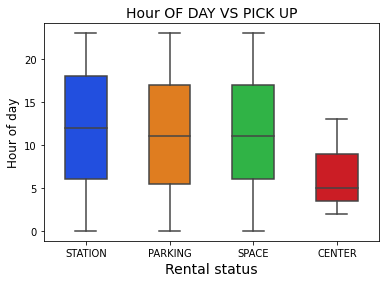

In [90]:
# Box plot
bplot = sns.boxplot(y='hour', x='Kind', data=df, width=0.5, palette="bright")
bplot.axes.set_title("Hour OF DAY VS PICK UP", fontsize=14)
bplot.set_xlabel('Rental status', fontsize=14)
bplot.set_ylabel("Hour of day", fontsize=12)

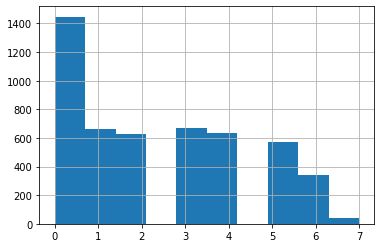

In [91]:
# Histogram
df.Cars.hist()

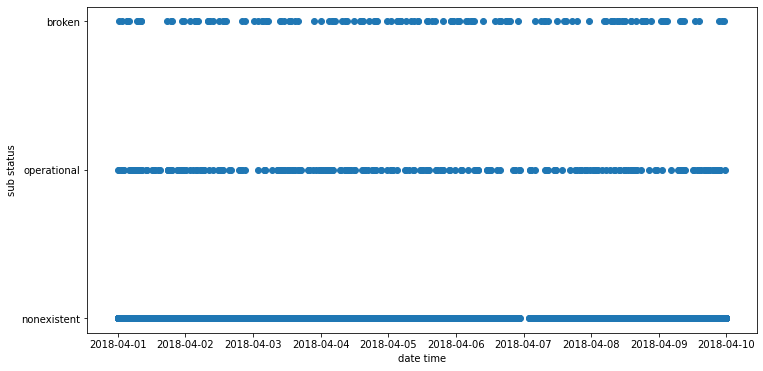

In [101]:
# Scatter plot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['date time'], df['Subscription status'])
ax.set_xlabel('date time')
ax.set_ylabel('sub status')
plt.show()

In [107]:
# Z-score

# function to get z-score 
outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# # ---
# The Z-score is the signed number of standard deviations by which the value of an observation 
# or data point is above the mean value of what is being observed or measured.
# The intuition behind Z-score is to describe any data point by finding their 
# relationship with the Standard Deviation and Mean of the group of data points. 
# Z-score is finding the distribution of data where mean is 0 
# and standard deviation is 1 i.e. normal distribution.
# You must be wondering that, how does this help in identifying the outliers? 
# Well, while calculating the Z-score we re-scale and center the data 
# and look for data points which are too far from zero. 
# These data points which are way too far from zero will be treated as the outliers. 
# In most of the cases a threshold of 3 or -3 is used i.e 
# if the Z-score value is greater than or less than 3 or -3 respectively, 
# that data point will be identified as an outlier.
cars_outlier = detect_outlier(df['Cars'])
blue_cars_outlier = detect_outlier(df['Bluecar counter'])
utlib_outlier = detect_outlier(df['Utilib counter'])
utilib1_4_outlier = detect_outlier(df['Utilib 1.4 counter'])

print(cars_outlier)

[1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


#5.0 ANSWERING QUESTIONS

In [ ]:
# CHECK OUR FINAL DATA
df.hea() 

####5.1 Q1 Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [109]:
head,tail,about,shape,columns,describe = check_data(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Cars                 5000 non-null   int64         
 2   Bluecar counter      5000 non-null   int64         
 3   Utilib counter       5000 non-null   int64         
 4   Utilib 1.4 counter   5000 non-null   int64         
 5   Charge Slots         5000 non-null   int64         
 6   Charging Status      5000 non-null   object        
 7   City                 5000 non-null   object        
 8   ID                   5000 non-null   object        
 9   Kind                 5000 non-null   object        
 10  Geo point            5000 non-null   object        
 11  Postal code          5000 non-null   int64         
 12  Public name          5000 non-null   object        
 13  Rental status        5000 non-nul

In [110]:
head

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00


In [111]:
shape

(5000, 24)

####5.2 Q2 What is the most popular hour for returning cars?

In [131]:
df['Kind'].values.tolist()[:10]

['STATION',
 'STATION',
 'STATION',
 'STATION',
 'PARKING',
 'STATION',
 'PARKING',
 'STATION',
 'STATION',
 'PARKING']

In [173]:
# Using sql
%sql DROP TABLE if EXISTS new_df;
%sql PERSIST new_df;
%sql SELECT * FROM new_df LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


index,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00.000000
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00.000000
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00.000000
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00.000000
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00.000000


In [178]:
%%sql 
SELECT MAX(hour), "kind" FROM new_df 
WHERE kind == "STATION" LIMIT 10;


 * sqlite://
Done.


MAX(hour),Kind
23,STATION


####5.3 Q3 What station is the most popular?
  1. Overall?
  2. At the most popular picking hour?

In [191]:
# overall
%%sql
SELECT Address FROM new_df
WHERE (SELECT hour FROM new_df) 
ORDER BY Address DESC LIMIT 3

 * sqlite://
Done.


Address
Quai de SÃ¨vres
Quai de SÃ¨vres
Quai de SÃ¨vres


In [192]:
# most pop hour
%%sql
SELECT Address FROM new_df
WHERE (SELECT MAX(hour) FROM new_df) 
ORDER BY Address DESC LIMIT 3

 * sqlite://
Done.


Address
Quai de SÃ¨vres
Quai de SÃ¨vres
Quai de SÃ¨vres


####5.6 Q6 What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
  1. Overall?
  2. At the most popular picking hour?

In [193]:
# OVERALL
%%sql
SELECT "Postal code" FROM new_df
ORDER BY "Bluecar counter" DESC LIMIT 3

 * sqlite://
Done.


Postal code
94150
78000
93600


In [196]:
%%sql
SELECT "Postal code" FROM new_df
WHERE (SELECT MAX(hour) FROM new_df)
ORDER BY "Bluecar counter" DESC LIMIT 3

 * sqlite://
Done.


Postal code
94150
78000
93600


###5.7 Q7 Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

In [197]:
new_df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute', 'date time'],
      dtype='object')

In [198]:
%%sql
SELECT 'Utilib counter' FROM new_df
WHERE (SELECT MAX(hour) FROM new_df)
ORDER BY 'Utilib counter' DESC LIMIT 3

 * sqlite://
Done.


'Utilib counter'
Utilib counter
Utilib counter
Utilib counter


In [199]:
%%sql
SELECT 'Utilib 1.4 counter' FROM new_df
WHERE (SELECT MAX(hour) FROM new_df)
ORDER BY 'Utilib 1.4 counter' DESC LIMIT 3

 * sqlite://
Done.


'Utilib 1.4 counter'
Utilib 1.4 counter
Utilib 1.4 counter
Utilib 1.4 counter
